<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-CLASSIFICATION-Mobile-Price-Range-Prediction-/blob/main/CAPSTONE_PROJECT_CLASSIFICATION(Mobile_Price_Range_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOBILE PRICE RANGE PREDICTION**

## Project Type - Classification
## Contribution - Individual

# **Problem Statement**

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

## **GitHub Link:**[link text](https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-CLASSIFICATION-Mobile-Price-Range-Prediction-)

## **Libraries**

In [ ]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math
import calendar

# visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# null value visualization Library
import missingno as msno

# Model Testing Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Variance Inflation Factor Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Classification Algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Dataset Loading

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# file path of dataset
path='/content/drive/MyDrive/Almabetter/Machine Learning /data_mobile_price_range.csv'
df=pd.read_csv(path,encoding="ISO-8859-1")

## Dataset First View

In [ ]:
# top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f" Number of rows in the dataset : {df.shape[0]} \n Number of columns in the dataset : {df.shape[1]}")

 Number of rows in the dataset : 2000 
 Number of columns in the dataset : 21


## Dataset Information

In [ ]:
# Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Basic stat description
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Missing Values/Null Values

In [ ]:
# Checking missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

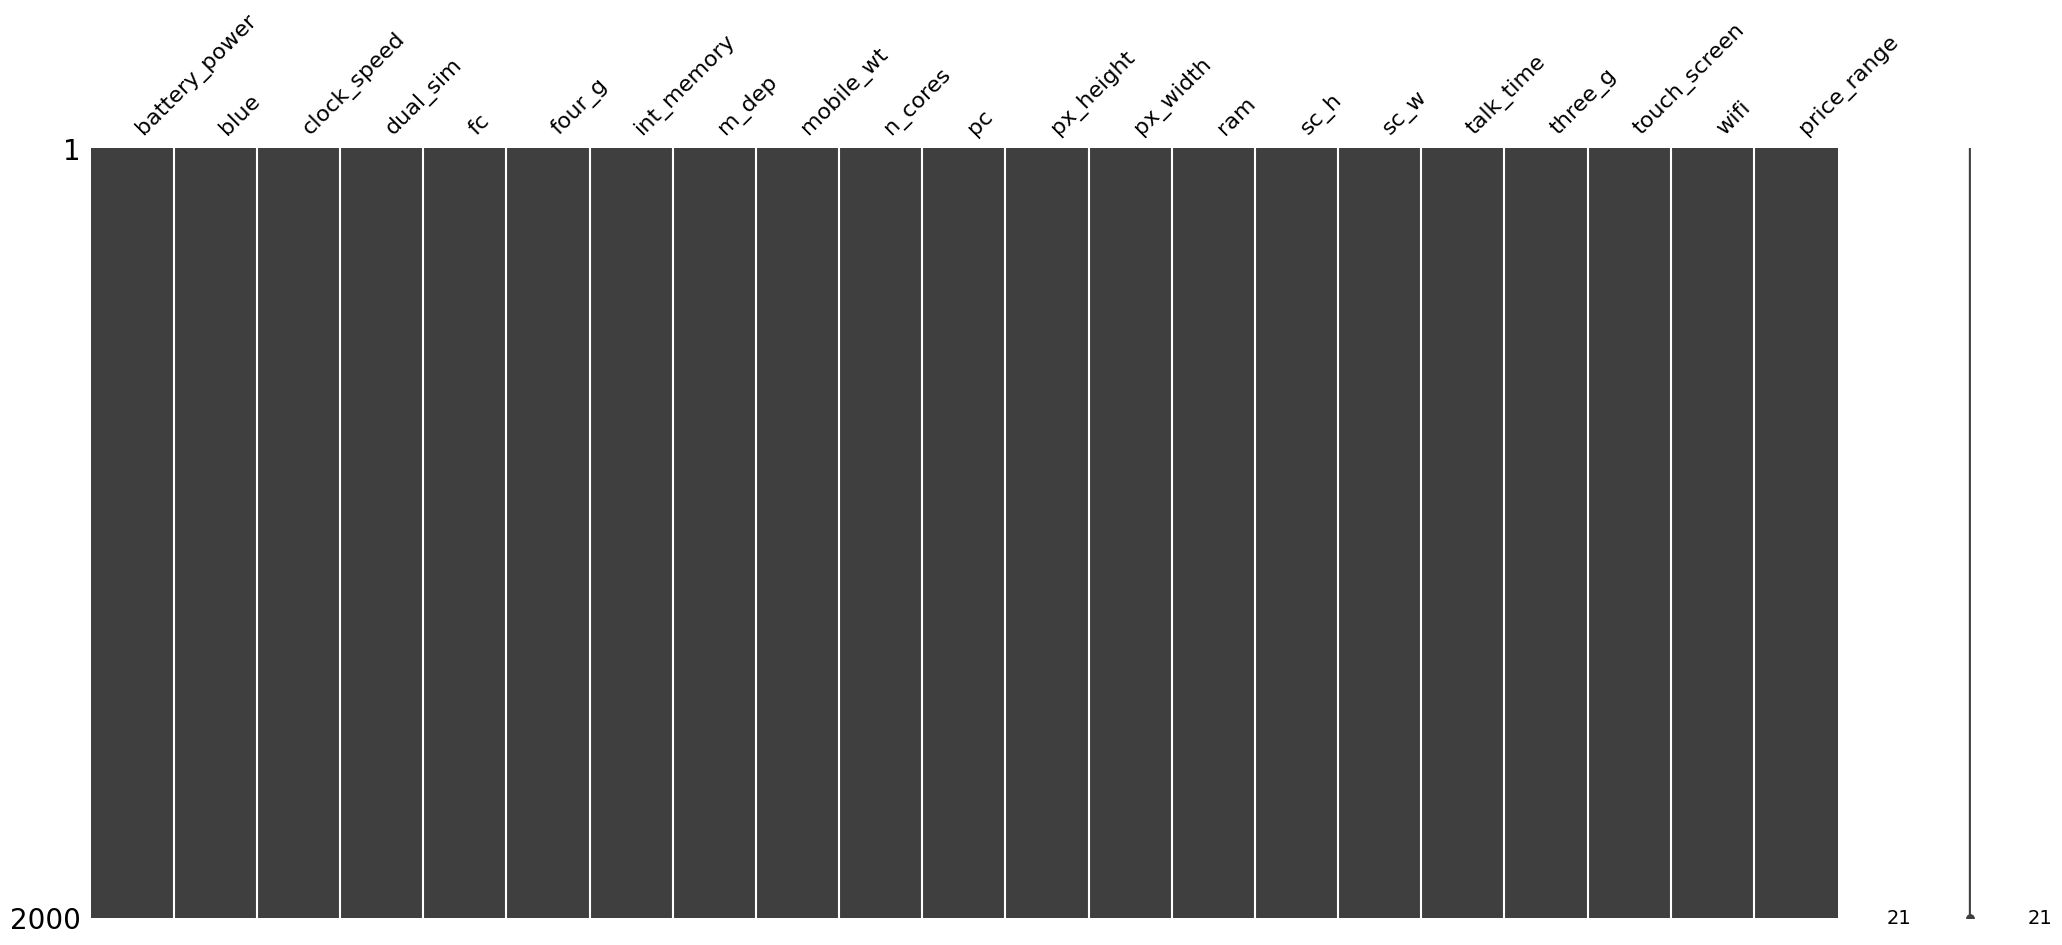

In [ ]:
# visualization missing values
msno.matrix(df)

In [ ]:
# Checking duplicat values
df.duplicated().sum()

0

## Check Unique Values for each variable.

In [ ]:
# Checking unique values
df.nunique(dropna = True).sort_values(ascending=False)

ram              1562
px_height        1137
px_width         1109
battery_power    1094
mobile_wt         121
int_memory         63
clock_speed        26
pc                 21
fc                 20
sc_w               19
talk_time          19
sc_h               15
m_dep              10
n_cores             8
price_range         4
blue                2
four_g              2
dual_sim            2
three_g             2
touch_screen        2
wifi                2
dtype: int64

## Attribute Information

### 1) Battery_power - Total energy a battery can store in one time measured in mAh
###2) Blue - Has bluetooth or not
###3) Clock_speed - speed at which microprocessor executes instructions
###4) Dual_sim - Has dual sim support or not
###5) Fc - Front Camera mega pixels
###6) Four_g - Has 4G or not
###7) Int_memory - Internal Memory in Gigabytes
###8) M_dep - Mobile Depth in cm
###9) Mobile_wt - Weight of mobile phone
###10) N_cores - Number of cores of processor
###11) Pc - Primary Camera mega pixels
###12) Px_height - Pixel Resolution Height
###13) Px_width - Pixel Resolution Width
###14) Ram - Random Access Memory in Mega
###15) Touch_screen - Has touch screen or not
###16) Wifi - Has wifi or not
###17) Sc_h - Screen Height of mobile in cm
###18) Sc_w - Screen Width of mobile in cm
###19) Talk_time - longest time that a single battery charge will last when you are
###20) Three_g - Has 3G or not
###21) Wifi - Has wifi or not
###22) Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

In [ ]:
# 0 values ​​exist in this column
print(len(df[df.sc_w == 0]))
print(len(df[df.px_height == 0]))

180
2


In [ ]:
# replace the 0 values with the mean of this column.
df['sc_w']=df['sc_w'].replace(0,df['sc_w'].mean())
df['px_height']=df['px_height'].replace(0,df['px_height'].mean())

## **About dataset :**
## This dataset has 2000 rows and 21 columns. This dataset of 21 columns has 0 values ​​in 2 columns. I want to replace the 0 values ​​with the mean of the same column. There are no null values ​​and duplicate values ​​in this dataset. The target column of this dataset has four classes.

In [ ]:
# Extracted by the class of the dataset target column
price_0=df[df['price_range']==0]
price_1=df[df['price_range']==1]
price_2=df[df['price_range']==2]
price_3=df[df['price_range']==3]

# **Exploratory Data Analysis**

## **Percentage of Phones which support 3G**

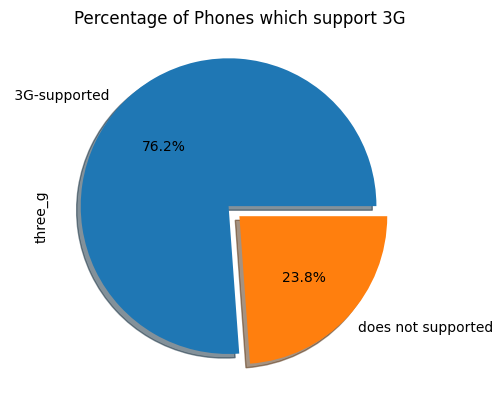

In [ ]:
# Percentage of Phones which support 3G
labels = ' 3G-supported' , 'does not supported'
explode = (0.1, 0.0)
threeg=df['three_g'].value_counts().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%',title = "Percentage of Phones which support 3G")
plt.show()

## **Insight :**
### Around 76% datapoints are 3G supported, rest 23% datapoints are not 3G supported


## **Percentage of Phones which support 4G**

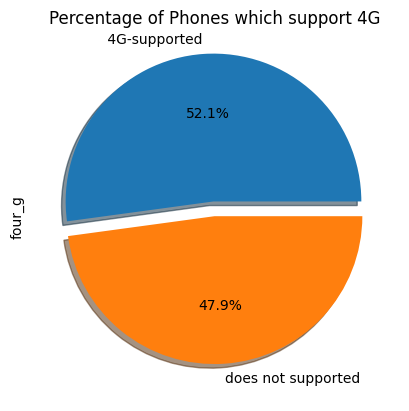

In [ ]:
#Percentage of Phones which support 4G
labels = ' 4G-supported' , 'does not supported'
explode = (0.1, 0.0)
threeg=df['four_g'].value_counts().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%',title = "Percentage of Phones which support 4G")
plt.show()

## **Insight :**
### Around 52% datapoints are 4G supported, rest 47% datapoints are not 4G supported


## **class imbalance check**

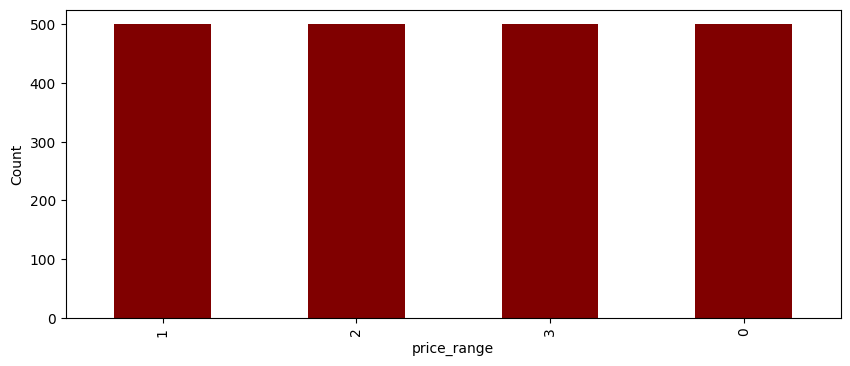

In [ ]:
# class imbalance check
price=df['price_range'].value_counts().plot(kind = "bar",color='maroon',figsize=(10,4))
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

## **Insight :**
### All classes have the same amount of datapoints

## **How mobile camera affects mobile price**

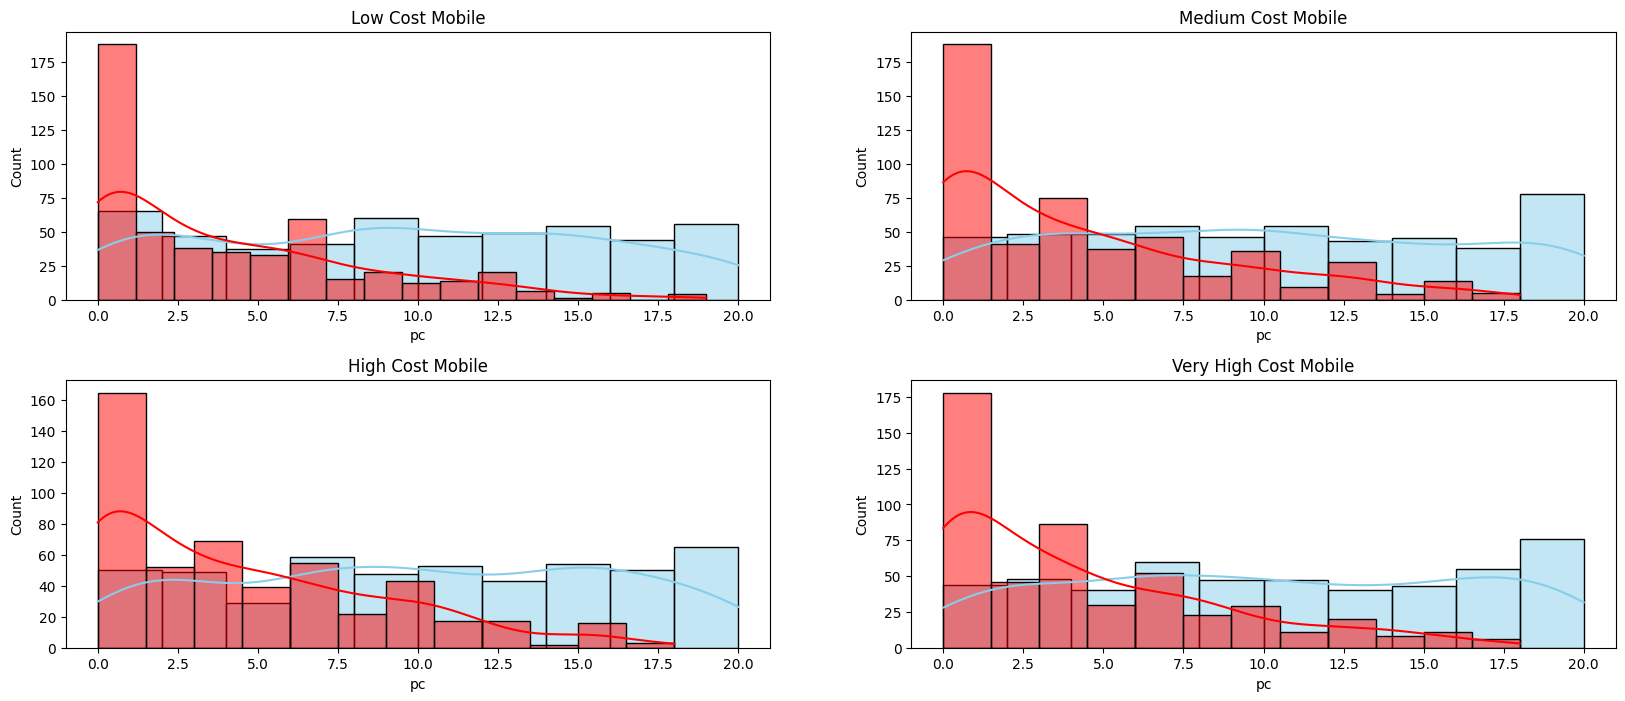

In [ ]:
#front camera and rare camera vs mobile price
f, ax = plt.subplots(2,2, figsize = (20,8))

a=sns.histplot(data=price_0, x="pc",ax = ax[0,0], color="skyblue", label="pc", kde=True)
a=sns.histplot(data=price_0, x="fc", ax = ax[0,0],color="red", label="fc", kde=True)
b=sns.histplot(data=price_1, x="pc", ax = ax[0,1],color="skyblue", label="pc", kde=True)
b=sns.histplot(data=price_1, x="fc", ax = ax[0,1],color="red", label="fc", kde=True)
c=sns.histplot(data=price_2, x="pc", ax = ax[1,0],color="skyblue", label="pc", kde=True)
c=sns.histplot(data=price_2, x="fc", ax = ax[1,0],color="red", label="fc", kde=True)
d=sns.histplot(data=price_3, x="pc", ax = ax[1,1],color="skyblue", label="pc", kde=True)
d=sns.histplot(data=price_3, x="fc", ax = ax[1,1],color="red", label="fc", kde=True)
#barplot title
a.set_title("Low Cost Mobile")
b.set_title("Medium Cost Mobile")
c.set_title("High Cost Mobile")
d.set_title("Very High Cost Mobile")
plt.subplots_adjust(hspace = 0.3)
plt.show()

## **Insight :**
### Pixel of front camera is showing less difference and Pixel of rear camera is increasing with mobile price.

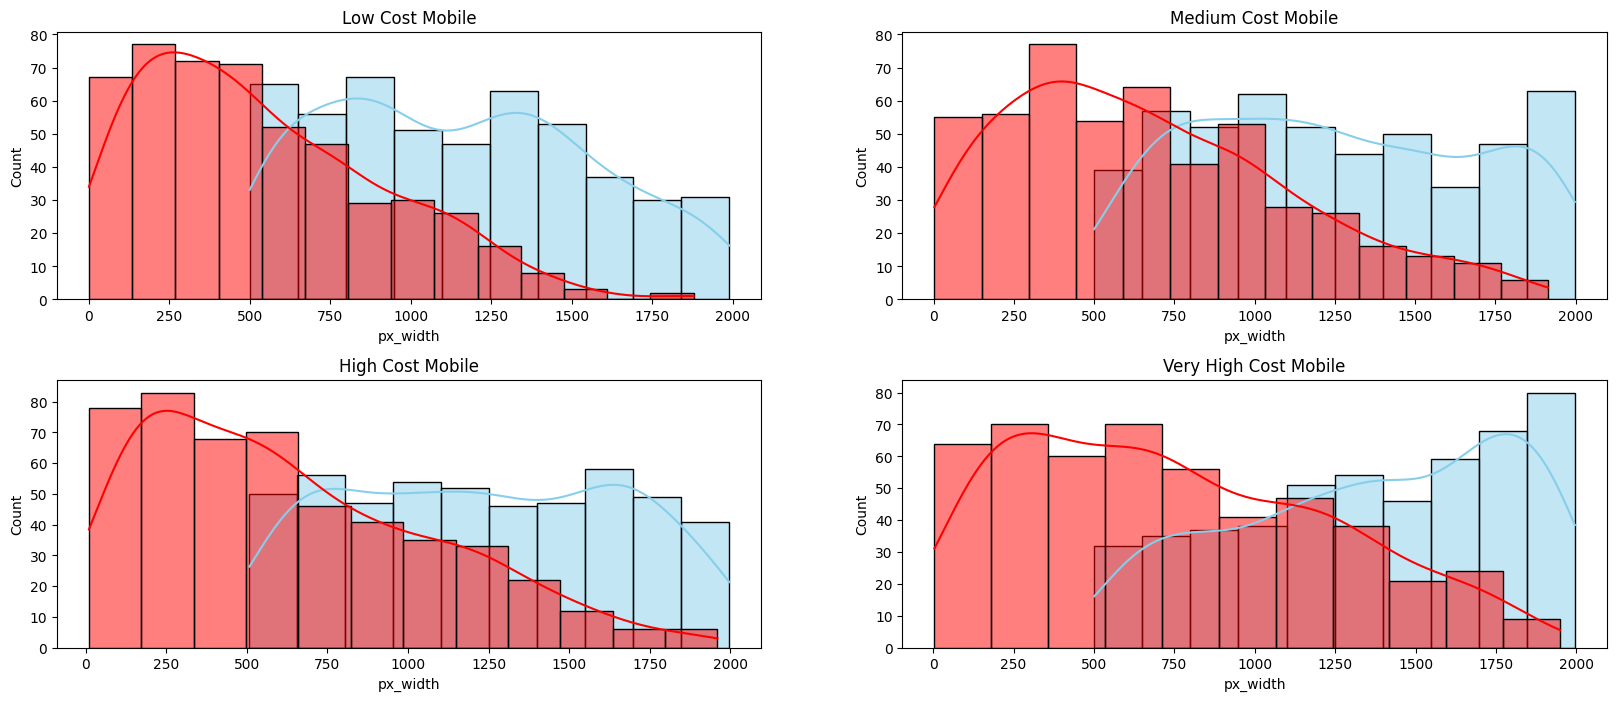

In [ ]:
#pixel width and pixel height vs mobile price
f, ax = plt.subplots(2,2, figsize = (20,8))

a=sns.histplot(data=price_0, x="px_width",ax = ax[0,0], color="skyblue", label="pc", kde=True)
a=sns.histplot(data=price_0, x="px_height", ax = ax[0,0],color="red", label="fc", kde=True)
b=sns.histplot(data=price_1, x="px_width", ax = ax[0,1],color="skyblue", label="pc", kde=True)
b=sns.histplot(data=price_1, x="px_height", ax = ax[0,1],color="red", label="fc", kde=True)
c=sns.histplot(data=price_2, x="px_width", ax = ax[1,0],color="skyblue", label="pc", kde=True)
c=sns.histplot(data=price_2, x="px_height", ax = ax[1,0],color="red", label="fc", kde=True)
d=sns.histplot(data=price_3, x="px_width", ax = ax[1,1],color="skyblue", label="pc", kde=True)
d=sns.histplot(data=price_3, x="px_height", ax = ax[1,1],color="red", label="fc", kde=True)
#barplot title
a.set_title("Low Cost Mobile")
b.set_title("Medium Cost Mobile")
c.set_title("High Cost Mobile")
d.set_title("Very High Cost Mobile")
plt.subplots_adjust(hspace = 0.3)
plt.show()

## **Insight :**
### Pixel height is showing less difference. Pixel width is increasing with mobile price.

## **How mobile screen affect mobile price**

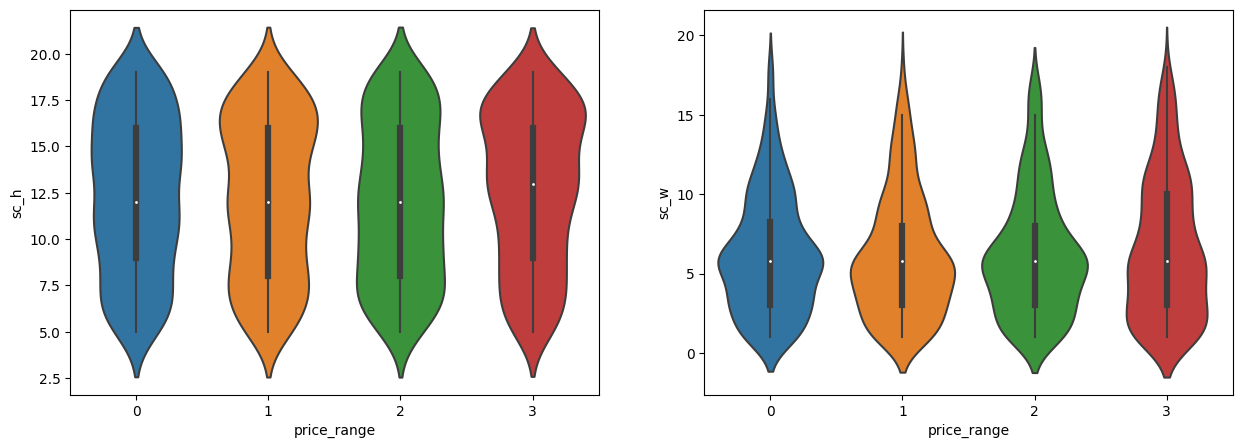

In [ ]:
# screen height and screen width vs mobile price
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.violinplot(x="price_range", y="sc_h", data=df, ax=axs[0])
sns.violinplot(x="price_range", y="sc_w", data=df, ax=axs[1])
plt.show()

## **Insight :**
### Screen width and screen height are less affecting mobile price, screen height and screen width have increased slightly in very high price mobile phones.

## **How mobile battery affect mobile price**

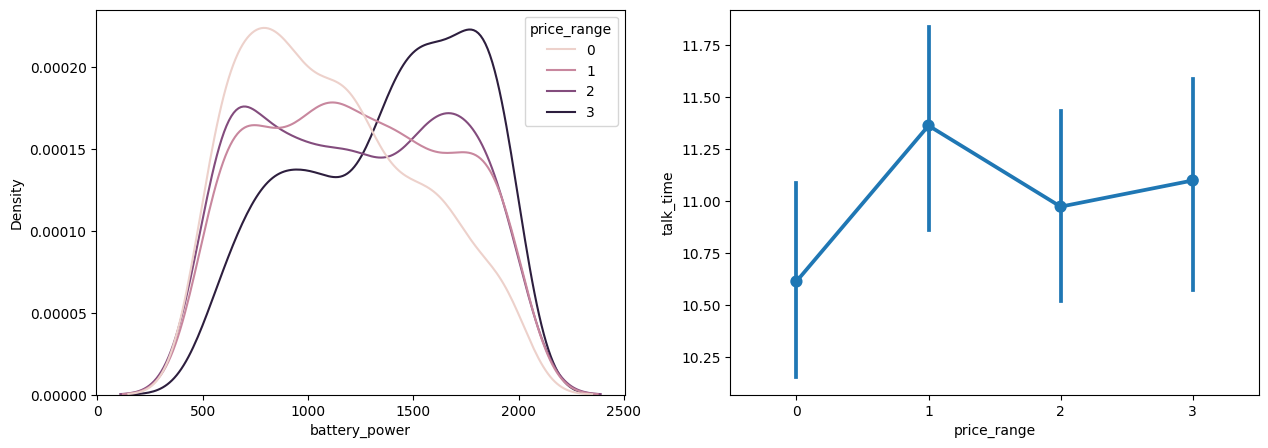

In [ ]:
# battery power and talk time vs mobile price
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='battery_power', hue='price_range',ax=ax[0])
sns.pointplot(y=df['talk_time'], x=df['price_range'],ax=ax[1])
plt.show()

## **Insight :**
### In low cost mobile most of the mobile battery is from 500 to 1000 and in medium and high cost mobile the mobile battery is stable but in very high cost mobile most of the mobile battery is from 1500 to 2000
### Talk time is less due to low battery life in low cost mobile

## **How mobile memory affect mobile price**

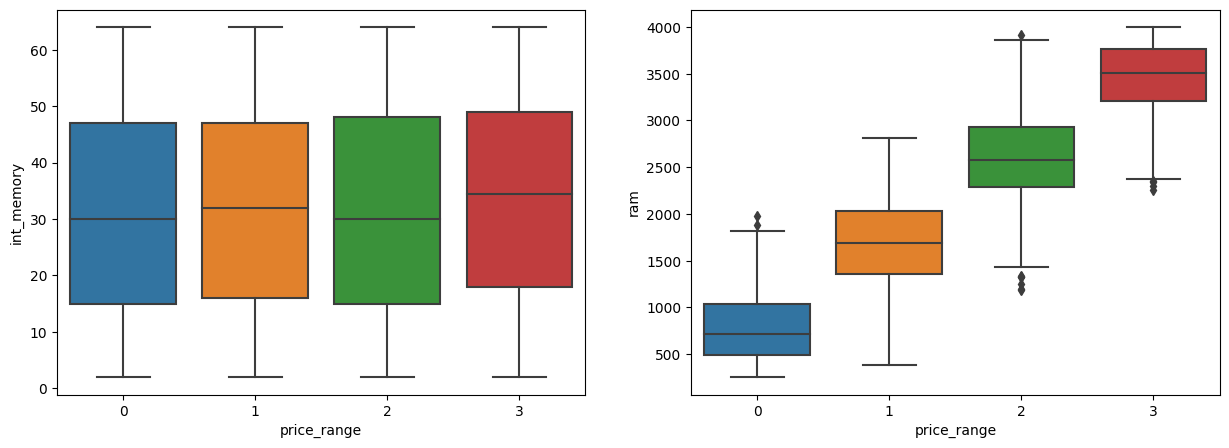

In [ ]:
# internal memory and ram vs mobile price
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x="price_range", y='int_memory', data=df,ax=ax[0])
sns.boxplot(x="price_range", y='ram', data=df,ax=ax[1])
plt.show()

## **Insight :**
### The internal memory of low cost, medium cost and high cost mobiles is almost same but the internal memory of very high cost mobiles is increased
### As the price of mobile is increasing, similarly the RAM of mobile is also increasing.

<Axes: >

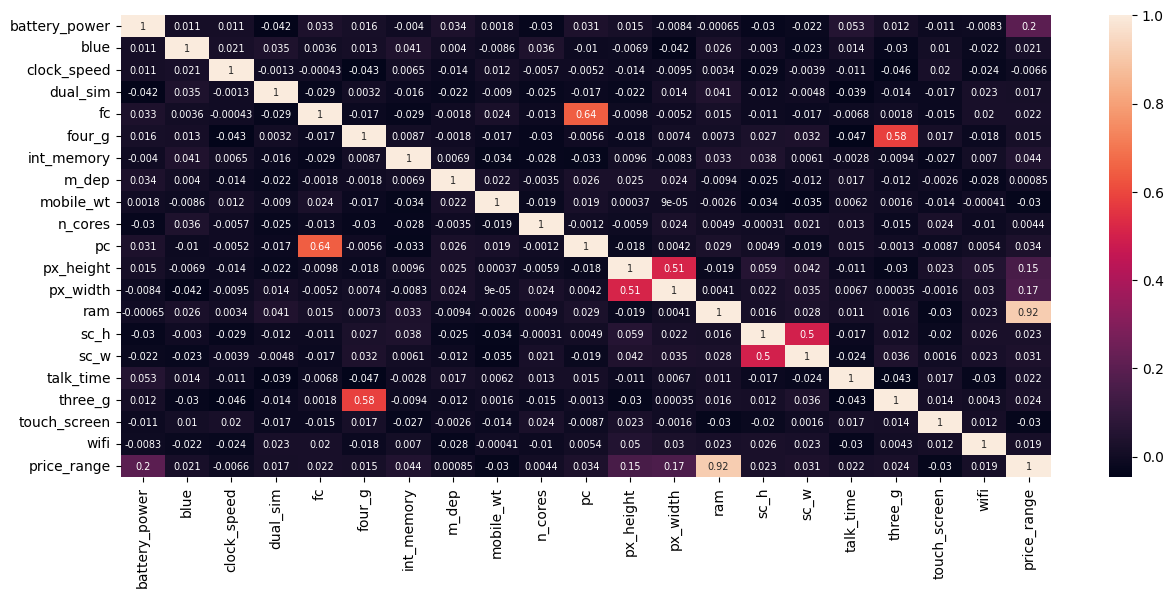

In [ ]:
#checking correlation using heatmap
plt.figure(figsize=(15,6))
correlation=df.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size": 7})

In [ ]:
# Multicollinearity
# vif function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Calculating VIF
calc_vif(df[[i for i in df.describe().columns if i not in ["price_range",'mobile_wt','touch_screen','clock_speed','sc_h','px_width']]])

,variables,VIF
0,battery_power,7.360536
1,blue,1.964563
2,dual_sim,1.972436
3,fc,3.410073
4,four_g,3.188713
5,int_memory,3.808338
6,m_dep,3.774559
7,n_cores,4.392131
8,pc,6.087646
9,px_height,2.986105


## **Insight :**
### 'mobile_wt', 'touch_screen', 'clock_speed', 'sc_h' and 'px_width' column have high vif so i remove these column

# **Model Implementation**

In [ ]:
# Creating X and Y
X=df.drop(['price_range','mobile_wt','touch_screen','clock_speed','sc_h','px_width'],axis=1)
Y=df['price_range']

In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1600, 15)
(400, 15)


In [ ]:
#scaling data using standardscaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Classification Algorithms**
- LogisticRegression
- Naive Bayes classifier
- Decision Tree Classifier
- Random Forest Classifier
- Xgboost Classifier


## **LogisticRegression**

In [ ]:
 # train a LogisticRegression on the training set
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# LogisticRegression Score
lr.score(X_train,Y_train)

0.915625

In [ ]:
lr_pred=lr.predict(X_test)
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.89      0.89      0.89        92
           2       0.87      0.84      0.86        99
           3       0.92      0.95      0.94       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



[[ 92   3   0   0]
 [  4  82   6   0]
 [  0   7  83   9]
 [  0   0   6 108]]


<Axes: >

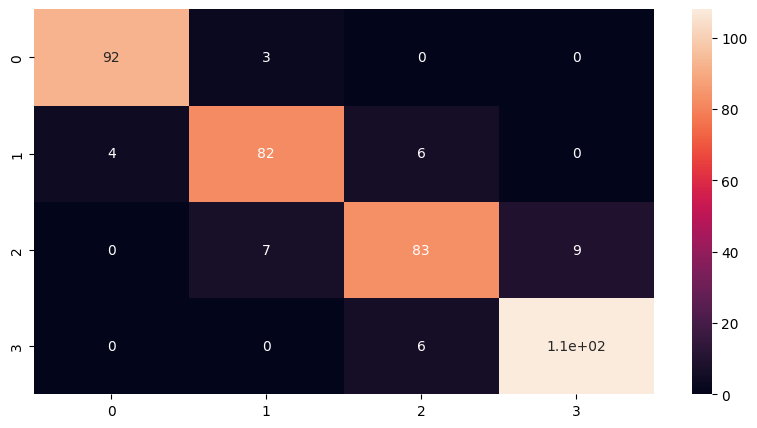

In [ ]:
# confusion matrix
matrix=confusion_matrix(Y_test,lr_pred)
print(matrix)
# confusion matrix visualizetion
plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True)

## **Naive Bayes classifier**

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Naive Bayes Classification score
gnb.score(X_train,Y_train)

0.8

In [ ]:
gnb_pred = gnb.predict(X_test)
print(classification_report(Y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        95
           1       0.72      0.73      0.72        92
           2       0.70      0.63      0.66        99
           3       0.85      0.93      0.89       114

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.81      0.80       400



[[ 87   8   0   0]
 [  6  67  19   0]
 [  0  18  62  19]
 [  0   0   8 106]]


<Axes: >

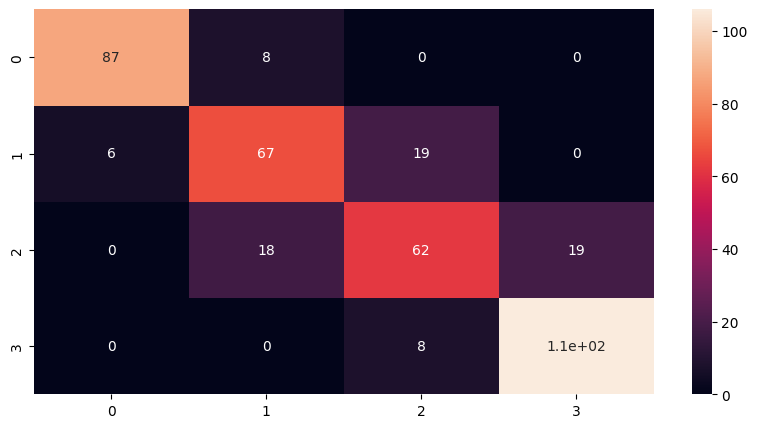

In [ ]:
# confusion matrix
matrix=confusion_matrix(Y_test,gnb_pred)
print(matrix)
# confusion matrix visualizetion
plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True)

## **Decision Tree Classifier**

In [ ]:
# Hyperparameter tuning  for Decision Tree
dtc = DecisionTreeClassifier(random_state = 0)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
dt_clssifier = GridSearchCV(dtc,param_grid,cv=5)
dt_clssifier.fit(X_train, Y_train)

In [ ]:
# getting best parameters
print("The best fit value is found out to be :" ,dt_clssifier.best_params_)

The best fit alpha value is found out to be : {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


In [ ]:
# Creating & Training Decision Tree Model
dt = DecisionTreeClassifier(random_state = 0,ccp_alpha= 0.001, criterion='entropy', max_depth= 9, max_features= 'auto')
dt.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=0)

In [ ]:
# DecisionTreeClassifier Score
dt.score(X_train,Y_train)

0.879375

In [ ]:
dt_pred = dt.predict(X_test)
print(classification_report(Y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        95
           1       0.72      0.73      0.72        92
           2       0.70      0.63      0.66        99
           3       0.85      0.93      0.89       114

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.81      0.80       400



[[65 28  1  1]
 [14 62 13  3]
 [ 0 30 47 22]
 [ 0  4 38 72]]


<Axes: >

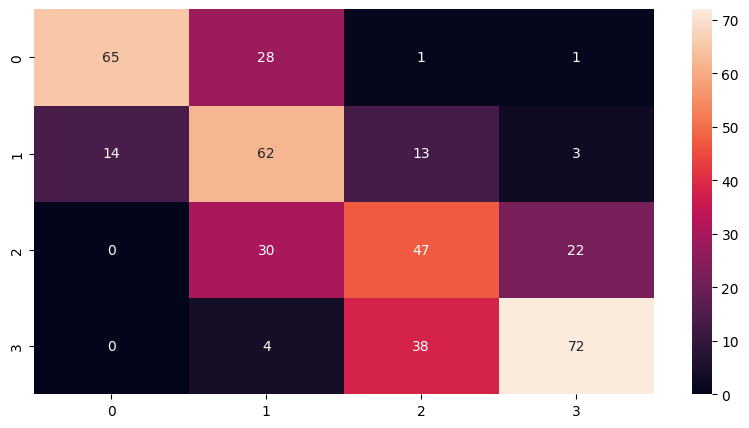

In [ ]:
# confusion matrix
matrix=confusion_matrix(Y_test,dt_pred)
print(matrix)
# confusion matrix visualizetion
plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True)

## **Random Forest Classifier**

In [ ]:
# Hyperparameter tuning  for Random Forest
rdfc = RandomForestClassifier(random_state = 0)
rdfc_clssifier = GridSearchCV(rdfc,param_grid,cv=5)
rdfc_clssifier.fit(X_train, Y_train)

In [ ]:
# getting best parameters
print("The best fit value is found out to be :" ,rdfc_clssifier.best_params_)

The best fit alpha value is found out to be : {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


In [ ]:
# Creating & Training Random Forest Model
rdfc = RandomForestClassifier(random_state = 0,ccp_alpha= 0.001, criterion='entropy', max_depth= 9, max_features= 'auto')
rdfc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=0)

In [ ]:
# RandomForestClassifier Score
rdfc.score(X_train,Y_train)

0.993125

In [ ]:
rdf_pred = rdfc.predict(X_test)
print(classification_report(Y_test,rdf_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        95
           1       0.77      0.79      0.78        92
           2       0.76      0.68      0.72        99
           3       0.90      0.92      0.91       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



[[ 93   2   0   0]
 [  7  73  12   0]
 [  0  20  67  12]
 [  0   0   9 105]]


<Axes: >

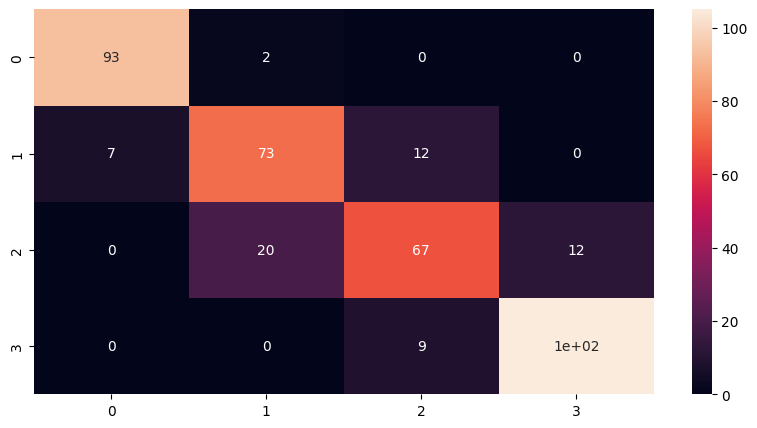

In [ ]:
# confusion matrix
matrix=confusion_matrix(Y_test,rdf_pred)
print(matrix)
# confusion matrix visualizetion
plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True)

## **XGBoost Classifier**

In [ ]:
# Hyperparameter tuning  for XGBoost
xgb = XGBClassifier(max_depth=5, objective='multi:softprob')
parameters = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'subsample': [0.3, 0.5, 0.8],
              'gamma': [1.5, 1.8],'learning_rate': [0.1, 0.01, 0.05]}
xgb_clssifier = GridSearchCV(xgb,param_grid=parameters)
xgb_clssifier.fit(X_train, Y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'subsample': [0.3, 0.5, 0.8]})

In [ ]:
# getting best parameters
print("The best fit value is found out to be :" ,xgb_clssifier.best_params_)

The best fit alpha value is found out to be : {'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180, 'subsample': 0.5}


In [ ]:
# Creating & Training XGBoost Model
xgb = XGBClassifier(learning_rate=0.1,gamma=1.5,subsample=0.5, max_depth= 3,n_estimators=180)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# XGBoost Classifier Score
xgb.score(X_train,Y_train)

0.956875

In [ ]:
xgb_pred =xgb.predict(X_test)
print(classification_report(Y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.88      0.85      0.86        92
           2       0.81      0.79      0.80        99
           3       0.90      0.92      0.91       114

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400



[[ 93   2   0   0]
 [  5  78   9   0]
 [  0   9  78  12]
 [  0   0   9 105]]


<Axes: >

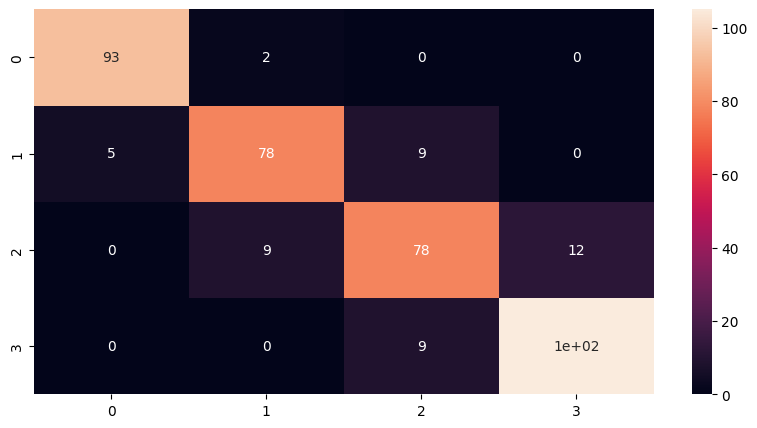

In [ ]:
# confusion matrix
matrix=confusion_matrix(Y_test,xgb_pred)
print(matrix)
# confusion matrix visualizetion
plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True)

## **EDA Final Conclusion**
###1) In low cost mobile most of the mobile battery is from 500 to 1000 and in medium and high cost mobile the mobile battery is stable but in very high cost mobile most of the mobile battery is from 1500 to 2000
### 2) Talk time is less due to low battery life in low cost mobile
### 3) Screen width and screen height are less affecting mobile price, screen height and screen width have increased slightly in very high price mobile phones.

### 4) Pixel height is showing less difference. Pixel width is increasing with mobile price.
### 5) Pixel of front camera is showing less difference and Pixel of rear camera is increasing with mobile price.
### 7) Around 76% datapoints are 3G supported, rest 23% datapoints are not 3G supported
### 8) Around 52% datapoints are 4G supported, rest 47% datapoints are not 4G supported
### 9) The internal memory of low cost, medium cost and high cost mobiles is almost same but the internal memory of very high cost mobiles is increased
### 10) As the price of mobile is increasing, similarly the RAM of mobile is also increasing.

## **Final** **Conclusion**
### From EDA we can see that here are mobile phones in 4 price ranges. All classes have the same amount of datapoints
### Class is not unbalanced and every class is important so training and test score is important
### Logestic regression and XGBoost model gives better results compared to other models

